In [3]:
import pandas as pd
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2

In [25]:
import os

os.chdir('/Users/sullivan42/workspace/cs231n_proj/cs231n_final_proj/data/output2')


In [26]:
df_brake = pd.read_csv('brake.csv')
df_camera = pd.read_csv('camera.csv')
df_gear = pd.read_csv('gear.csv')
df_gps = pd.read_csv('gps.csv')
df_imu = pd.read_csv('imu.csv')
df_intrp = pd.read_csv('interpolated.csv')
df_steering = pd.read_csv('steering.csv')
df_throttle = pd.read_csv('throttle.csv')


In [24]:
df_steering.describe()

,timestamp,angle,torque,speed
count,3.797600e+04,37976.000000,37976.000000,37976.000000
mean,1.475187e+18,-0.050628,0.076395,10.757533
std,2.196205e+11,0.519986,0.531649,6.819145
min,1.475187e+18,-4.145157,-3.000000,0.000000
25%,1.475187e+18,0.010472,-0.062500,5.693750
50%,1.475187e+18,0.024435,0.062500,11.236111
75%,1.475188e+18,0.047124,0.375000,15.544444
max,1.475188e+18,2.572615,2.500000,22.772223


In [29]:
df_steering.corr()

,timestamp,angle,torque,speed
timestamp,1.000000,-0.075022,-0.024811,-0.109261
angle,-0.075022,1.000000,0.700455,0.159495
torque,-0.024811,0.700455,1.000000,0.147516
speed,-0.109261,0.159495,0.147516,1.000000


In [23]:
df_throttle.describe()

,timestamp,throttle_input
count,3.797800e+04,37978.000000
mean,1.475187e+18,0.208192
std,2.196143e+11,0.059379
min,1.475187e+18,0.149950
25%,1.475187e+18,0.149950
50%,1.475187e+18,0.210880
75%,1.475188e+18,0.260227
max,1.475188e+18,0.376242


In [27]:
df_intrp.describe()

,timestamp,width,height,angle,torque,speed,lat,long,alt
count,4.414040e+05,441404.0,441404.0,441404.000000,441404.000000,441404.000000,441404.000000,441404.000000,441404.000000
mean,1.477435e+18,640.0,480.0,-0.005117,0.040660,11.356865,37.538620,-122.291768,-40.540728
std,3.099012e+12,0.0,0.0,0.051627,0.396865,3.788733,0.333939,1.062237,9.531408
min,1.477430e+18,640.0,480.0,-0.676064,-1.942378,0.000000,0.000000,-122.466101,-42.500000
25%,1.477432e+18,640.0,480.0,-0.020944,-0.193307,9.387467,37.477966,-122.390452,-42.500000
50%,1.477435e+18,640.0,480.0,-0.003491,0.054631,12.242512,37.544596,-122.305841,-42.500000
75%,1.477437e+18,640.0,480.0,0.010472,0.296698,14.034819,37.601211,-122.223914,-42.500000
max,1.477441e+18,640.0,480.0,0.396190,1.927036,20.123834,37.689157,0.000000,6.000000


In [7]:
df_intrp[np.abs(df_intrp.angle) < .1].count() 

index        417732
timestamp    417732
width        417732
height       417732
frame_id     417732
filename     417732
angle        417732
torque       417732
speed        417732
lat          417732
long         417732
alt          417732
dtype: int64

In [8]:
417732/441404

0.9463711248652028

In [21]:
df_imu.describe()

,timestamp,ax,ay,az
count,7.589800e+04,75898.000000,75898.000000,75898.000000
mean,1.475187e+18,0.107441,-0.085039,9.873228
std,2.196184e+11,0.400988,0.653664,0.336216
min,1.475187e+18,-2.920000,-2.770000,7.160000
25%,1.475187e+18,-0.010000,-0.320000,9.710000
50%,1.475187e+18,0.160000,-0.130000,9.810000
75%,1.475188e+18,0.270000,0.210000,10.010000
max,1.475188e+18,3.370000,2.390000,13.540000


In [20]:
df_gps.describe()

,timestamp,status,service,lat,long,alt
count,7.600000e+02,760.0,760.0,760.000000,760.000000,760.000000
mean,1.475187e+18,0.0,1.0,37.390744,-122.126065,-17.356579
std,2.195322e+11,0.0,0.0,0.009894,0.010545,24.249496
min,1.475187e+18,0.0,1.0,37.373504,-122.145024,-42.500000
25%,1.475187e+18,0.0,1.0,37.381492,-122.134176,-42.500000
50%,1.475187e+18,0.0,1.0,37.392205,-122.127424,6.000000
75%,1.475188e+18,0.0,1.0,37.399761,-122.114283,6.000000
max,1.475188e+18,0.0,1.0,37.404475,-122.114261,6.000000


In [19]:
df_gear.describe()

,timestamp,gear_state,gear_cmd
count,1.519100e+04,15191.0,15191.0
mean,1.475187e+18,4.0,0.0
std,2.196335e+11,0.0,0.0
min,1.475187e+18,4.0,0.0
25%,1.475187e+18,4.0,0.0
50%,1.475187e+18,4.0,0.0
75%,1.475188e+18,4.0,0.0
max,1.475188e+18,4.0,0.0


In [18]:
df_camera.describe()

,timestamp,width,height
count,4.563600e+04,45636.0,45636.0
mean,1.475187e+18,640.0,480.0
std,2.195994e+11,0.0,0.0
min,1.475187e+18,640.0,480.0
25%,1.475187e+18,640.0,480.0
50%,1.475187e+18,640.0,480.0
75%,1.475188e+18,640.0,480.0
max,1.475188e+18,640.0,480.0


In [17]:
df_brake.describe()


,timestamp,width,height
count,4.563600e+04,45636.0,45636.0
mean,1.475187e+18,640.0,480.0
std,2.195994e+11,0.0,0.0
min,1.475187e+18,640.0,480.0
25%,1.475187e+18,640.0,480.0
50%,1.475187e+18,640.0,480.0
75%,1.475188e+18,640.0,480.0
max,1.475188e+18,640.0,480.0


In [11]:
df_steer = pd.read_csv('steering.csv')
df_steer

,timestamp,angle,torque,speed
0,1475186965539079525,-0.047124,-0.5625,14.613889
1,1475186965559600255,-0.045379,-0.5625,14.613889
2,1475186965579162515,-0.045379,-0.5000,14.608334
3,1475186965599323214,-0.045379,-0.6250,14.605556
4,1475186965619197024,-0.047124,-0.7500,14.608334
5,1475186965639366603,-0.047124,-0.6250,14.613889
6,1475186965659456415,-0.047124,-0.5625,14.616667
7,1475186965679364457,-0.045379,-0.4375,14.616667
8,1475186965699477537,-0.043633,-0.3125,14.613889
9,1475186965719584256,-0.043633,-0.2500,14.613889


In [12]:
df_steer.columns

Index(['timestamp', 'angle', 'torque', 'speed'], dtype='object')

In [13]:
df_steer.shape

(37976, 4)

In [14]:
df_steer.describe()

,timestamp,angle,torque,speed
count,3.797600e+04,37976.000000,37976.000000,37976.000000
mean,1.475187e+18,-0.050628,0.076395,10.757533
std,2.196205e+11,0.519986,0.531649,6.819145
min,1.475187e+18,-4.145157,-3.000000,0.000000
25%,1.475187e+18,0.010472,-0.062500,5.693750
50%,1.475187e+18,0.024435,0.062500,11.236111
75%,1.475188e+18,0.047124,0.375000,15.544444
max,1.475188e+18,2.572615,2.500000,22.772223


Text(0,0.5,'Number of Image Samples')

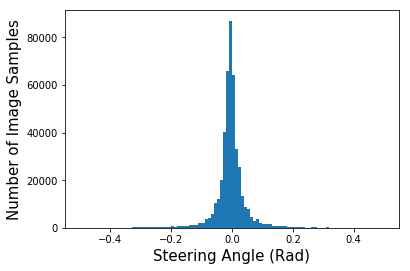

In [11]:
plt.hist(df_intrp['angle'],bins = 100,range = [-.5, .5])
plt.xlabel('Steering Angle (Rad)', fontsize = 15)
plt.ylabel('Number of Image Samples', fontsize = 15)

In [32]:
def fliph_image(img):
    """
    Returns a horizontally flipped image
    """
    return cv2.flip(img, 1)

In [20]:
import os

os.chdir('/Users/sullivan42/workspace/cs231n_proj/cs231n_final_proj/data/output/center')
%matplotlib inline


Text(0.5,1,'2.5 radian turn Original Image')

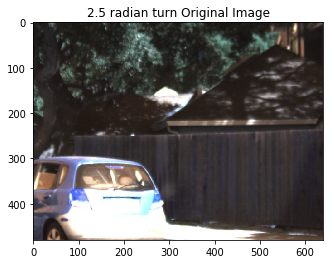

In [21]:
imgF = '1475187649255167811.jpg'
img = cv2.imread(imgF)
plt.imshow(img)
plt.title('2.5 radian turn Original Image')

Text(0.5,1,'2.5 radian turn Flipped Image')

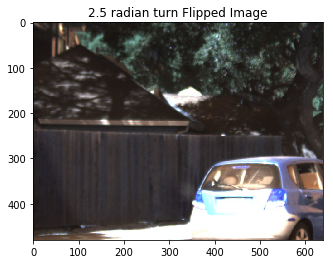

In [22]:
img_flip = cv2.flip(img, 1)
plt.imshow(img_flip)
plt.title('2.5 radian turn Flipped Image')

In [201]:
img[0:int(img.shape[0]/2),:]
print()

In [198]:
def crop_top_half(image):
    cropped_img = image[int(img.shape[0]/2):img.shape[0],:]
    return cropped_img

Text(0.5,1,'Cropped Image')

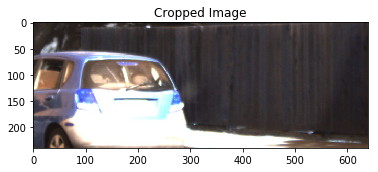

In [202]:
img_crp = crop_top_half(img)
plt.imshow(img_crp)
plt.title('Cropped Image')

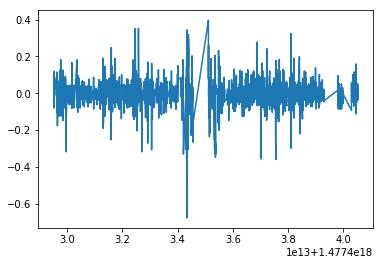

In [12]:
plt.plot(df_intrp['timestamp'],df_intrp['angle'])

In [15]:
from matplotlib import cm as cm


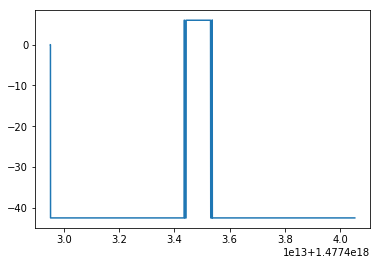

In [13]:
plt.plot(df_intrp['timestamp'],df_intrp['alt'])

           angle    torque     speed       lat      long       alt
angle   1.000000  0.596305 -0.023857 -0.007957  0.000058 -0.063420
torque  0.596305  1.000000 -0.066688 -0.026654  0.008007 -0.139996
speed  -0.023857 -0.066688  1.000000  0.044815 -0.025823  0.035182
lat    -0.007957 -0.026654  0.044815  1.000000 -0.989857  0.049964
long    0.000058  0.008007 -0.025823 -0.989857  1.000000  0.005584
alt    -0.063420 -0.139996  0.035182  0.049964  0.005584  1.000000


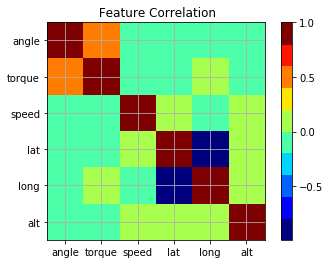

In [16]:
df = df_intrp[['angle','torque','speed','lat','long','alt']]
print(df.corr())

fig = plt.figure(111)

ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 10)

cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)

ax1.grid(True)
plt.title(' Feature Correlation')
labels=['','angle','torque','speed','lat','long','alt']
#ax1.set_ticks(np.arrange(5))
ax1.set_xticklabels(labels,fontsize=10)
ax1.set_yticklabels(labels,fontsize=10)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-1,-.5,0, .5,1])
plt.show()

Text(0.5,0,'Epoch')

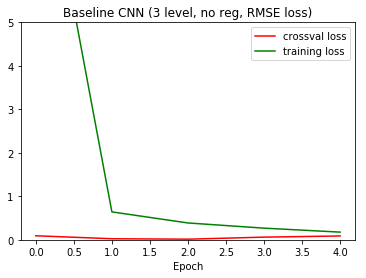

In [42]:
ep = range(5)
x_loss = [.0928,.0244,.0143,.0613,.0885]
t_loss = [10,.6417,.3871,.2680,.1763]
plt.plot(ep,x_loss,'r')
plt.plot(ep,t_loss,'g')
plt.ylim(0,5)
plt.legend( ('crossval loss', 'training loss'))
plt.title('Baseline CNN (3 level, no reg, RMSE loss)')
plt.xlabel('Epoch')

Text(0.5,0,'Epoch')

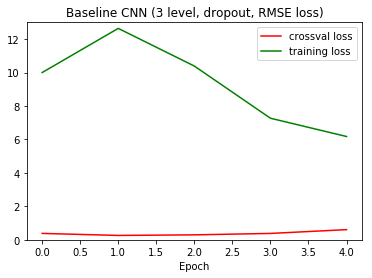

In [43]:
ep = range(5)
x_loss = [.3822,.261,.2956,.3809,.6071]
t_loss = [10,12.64,10.3871,7.2680,6.1763]
plt.plot(ep,x_loss,'r')
plt.plot(ep,t_loss,'g')
plt.ylim(0,13)
plt.legend( ('crossval loss', 'training loss'))
plt.title('Baseline CNN (3 level, dropout, RMSE loss)')
plt.xlabel('Epoch')